In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas.testing as tm
from scipy.stats import gamma
plt.rcParams.update({'figure.autolayout': True, 'font.size': 14, })
plt.rcParams["font.family"] = "Helvetica"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})



In [32]:
vclass = ["Medium duty truck", 'Small diesel van', 'Medium duty electric truck', 
          'Small electric van', 'Electric cargo bicycle', 
          'Quad-copter drone']
n = (0.95*0.88) # 88% charging efficiency and 5% transmission losses 
eff = np.array([1, 1, n, n, n, n])
e = np.array([11, 4.9, 3.13, 1.36, 0.083, 0.039])/eff
ghg_fuel = np.array([69.5, 69.5, 177, 177, 177, 177])*e
ghg_upstream = np.array([15.34, 15.34, 22, 22, 22, 22])*e
#ghg_battery = np.array([0, 0, 16.6, 16.6, 16.6, 5.9])*e
GHG_energy = np.array([107, 182, 249]) # egrid 
GHG_battery = np.array([10.1, 33.7, 67.3]) #

df = pd.DataFrame({"vclass":vclass, "energy": e, "ghg_fuel": ghg_fuel, "ghg_upstream": ghg_upstream})
df['e_high'] = df.energy*0.2
df['e_low'] = df.energy*0.2
df.loc[5,["e_high","e_low"]] = 0

In [33]:
df

,vclass,energy,ghg_fuel,ghg_upstream,e_high,e_low
0,Medium duty truck,11.000000,764.500000,168.740000,2.200000,2.200000
1,Small diesel van,4.900000,340.550000,75.166000,0.980000,0.980000
2,Medium duty electric truck,3.744019,662.691388,82.368421,0.748804,0.748804
3,Small electric van,1.626794,287.942584,35.789474,0.325359,0.325359
4,Electric cargo bicycle,0.099282,17.572967,2.184211,0.019856,0.019856
5,Quad-copter drone,0.046651,8.257177,1.026316,0.000000,0.000000


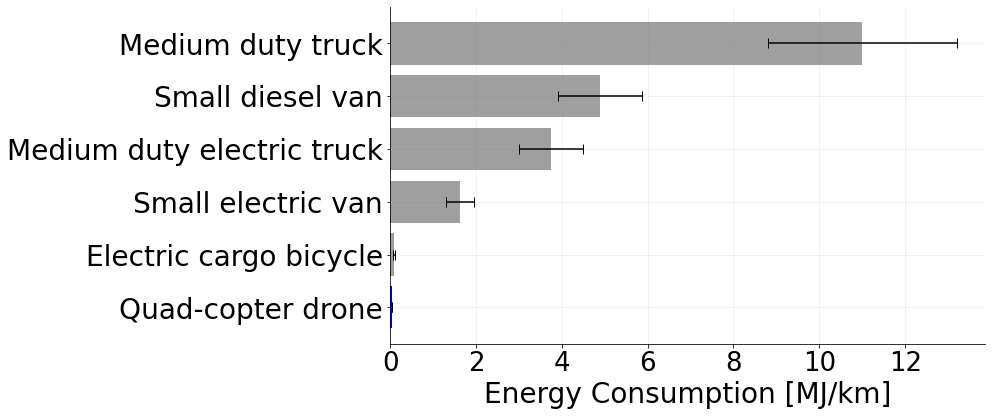

In [34]:
df1 = df.sort_values(by = ['energy'], ascending=True).copy()

plt.figure(figsize=(14,6))
color_others = "#9F9F9F"


plt.barh(df1.vclass, df1.energy , color = ["blue", color_others, color_others, color_others, color_others, color_others ], 
         xerr= np.array([df1.e_low,df1.e_high]), capsize =5)
plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
sns.despine(top=True, right=True)
plt.xlabel('Energy Consumption [MJ/km]', fontsize=28)
plt.grid(b=True, which='major', axis='both', color='gray', linewidth=1.0, alpha=0.1)
plt.savefig("energy_km.png")
plt.show()




In [35]:
# Assumptions
# Trucks have on average 0.7 stops/km @FleetDNA and deliver 3 packages per stop on average
# Vans have on average 1.74 stops/km @FleetDNA and deliver 2 packages per stop on average

stop_km = np.array([0.7, 1.74, 0.7, 1.74, 1, 0.25])
pack_stop = np.array([3, 2, 3, 2, 1, 1])
pack_km = pack_stop*stop_km
e_pack = df.energy/pack_km
print("pack per km", pack_km)

pack_km_high = np.array([1.5, 1.5, 1.5, 1.5, 0.25, 0.125])
pack_km_low = np.array([5, 5, 5, 5, 3, 0.5])


df['e_pack'] = df.energy/pack_km
df['e_pack_low'] = np.fabs(df.energy/pack_km_low - df.e_pack)
df['e_pack_high'] = np.fabs(df.energy/pack_km_high - df.e_pack)
df

pack per km [2.1  3.48 2.1  3.48 1.   0.25]


,vclass,energy,ghg_fuel,ghg_upstream,e_high,e_low,e_pack,e_pack_low,e_pack_high
0,Medium duty truck,11.000000,764.500000,168.740000,2.200000,2.200000,5.238095,3.038095,2.095238
1,Small diesel van,4.900000,340.550000,75.166000,0.980000,0.980000,1.408046,0.428046,1.858621
2,Medium duty electric truck,3.744019,662.691388,82.368421,0.748804,0.748804,1.782866,1.034062,0.713147
3,Small electric van,1.626794,287.942584,35.789474,0.325359,0.325359,0.467470,0.142111,0.617060
4,Electric cargo bicycle,0.099282,17.572967,2.184211,0.019856,0.019856,0.099282,0.066188,0.297847
5,Quad-copter drone,0.046651,8.257177,1.026316,0.000000,0.000000,0.186603,0.093301,0.186603


<Figure size 1008x576 with 0 Axes>

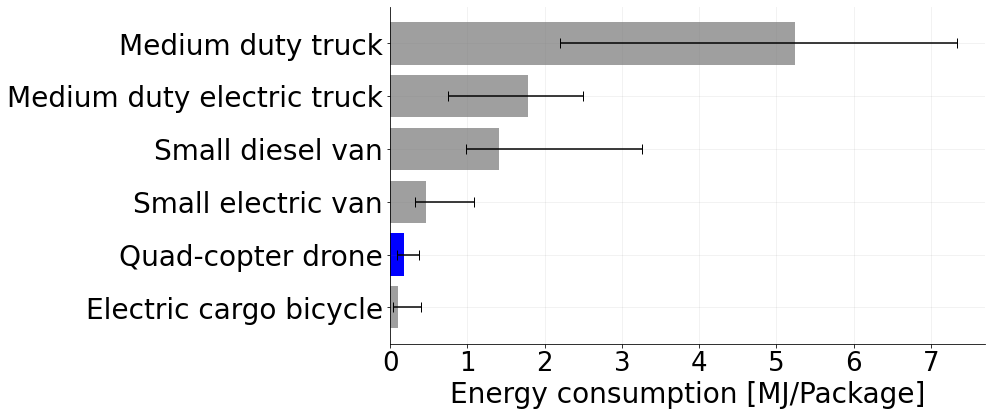

In [36]:
df1 = df.sort_values(by = ['e_pack'], ascending=True).copy()

plt.figure(figsize=(14,8))
color_others = "#9F9F9F"

plt.figure(figsize=(14,6))

plt.barh(df1.vclass, df1.e_pack , color = [color_others, "blue", color_others, color_others, color_others, color_others], 
         xerr= np.array([df1.e_pack_low,df1.e_pack_high]), capsize =5)

plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
sns.despine(top=True, right=True)
plt.xlabel('Energy consumption [MJ/Package]', fontsize=28)
plt.grid(b=True, which='major', axis='both', color='gray', linewidth=1.0, alpha=0.1)
plt.savefig("energy_pack.png")
plt.show()

In [37]:
df

,vclass,energy,ghg_fuel,ghg_upstream,e_high,e_low,e_pack,e_pack_low,e_pack_high
0,Medium duty truck,11.000000,764.500000,168.740000,2.200000,2.200000,5.238095,3.038095,2.095238
1,Small diesel van,4.900000,340.550000,75.166000,0.980000,0.980000,1.408046,0.428046,1.858621
2,Medium duty electric truck,3.744019,662.691388,82.368421,0.748804,0.748804,1.782866,1.034062,0.713147
3,Small electric van,1.626794,287.942584,35.789474,0.325359,0.325359,0.467470,0.142111,0.617060
4,Electric cargo bicycle,0.099282,17.572967,2.184211,0.019856,0.019856,0.099282,0.066188,0.297847
5,Quad-copter drone,0.046651,8.257177,1.026316,0.000000,0.000000,0.186603,0.093301,0.186603


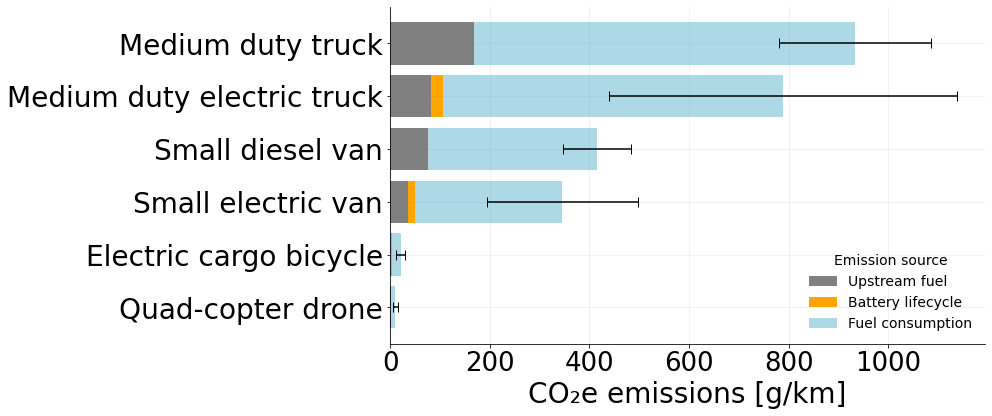

In [38]:
ghg_fuel = np.array([69.5, 69.5, 182, 182, 182, 182])
ghg_upstream = np.array([15.34, 15.34, 22, 22, 22, 22])
#ghg_battery = np.array([0, 0, 16.6, 16.6, 16.6, 5.9])

ghg_fuel_low = np.array([69.5, 69.5, 111, 111, 111, 111])

ghg_fuel_high = np.array([69.5, 69.5, 250, 250, 250, 250])

df["ghg_km_fuel"] = df.energy*ghg_fuel
df['ghg_km_upstream'] = df.energy*ghg_upstream
df['ghg_km_battery'] = np.array([0, 0, 24.5, 14.1, 1.3, 0.76])
df['ghg_km_battery_high'] = np.array([0, 0, 24.5, 14.1, 1.3, 1.52])
df['ghg_km_battery_low'] = np.array([0, 0, 24.5, 14.1, 1.3, 0.23])

df["ghg_km_fuel_low"] = df.energy*ghg_fuel_low*(0.8)
df["ghg_km_fuel_high"] = df.energy*ghg_fuel_high*(1.2)

df['ghg_base'] = df.ghg_km_fuel + df.ghg_km_upstream + df.ghg_km_battery
df['ghg_high'] = df.ghg_km_fuel_high + df.ghg_km_upstream + df.ghg_km_battery_high
df['ghg_low'] = df.ghg_km_fuel_low + df.ghg_km_upstream + df.ghg_km_battery_low

df['ghg_error_high'] = df.ghg_high - df.ghg_base 
df['ghg_error_low'] = df.ghg_base - df.ghg_low


df1 = df.sort_values(by = ['ghg_fuel'], ascending=True).copy()


plt.figure(figsize=(14,6))
plt.barh(df1.vclass, df1.ghg_km_upstream, color='gray', label = 'Upstream fuel')
plt.barh(df1.vclass, df1.ghg_km_battery, color='orange', left= df1.ghg_km_upstream, label = 'Battery lifecycle')
plt.barh(df1.vclass, df1.ghg_km_fuel, color = 'lightblue', left=df1.ghg_km_battery + df1.ghg_km_upstream, 
         label = 'Fuel consumption', xerr= np.array([df1.ghg_error_low,df1.ghg_error_low]), capsize =5)
plt.legend(title = 'Emission source', frameon=False)

plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
sns.despine(top=True, right=True)
plt.xlabel('CO₂e emissions [g/km]', fontsize=28)
plt.grid(b=True, which='major', axis='both', color='gray', linewidth=1.0, alpha=0.1)
plt.savefig("ghg_km.png")
plt.show()

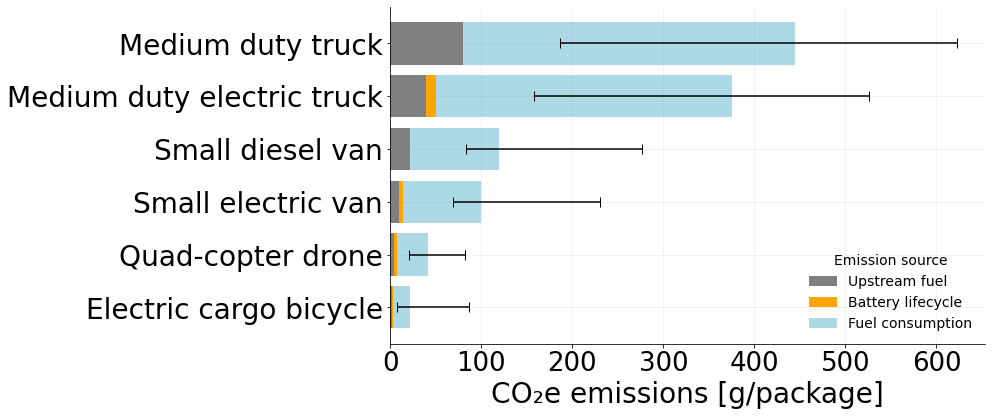

In [39]:
stop_km = np.array([0.7, 1.74, 0.7, 1.74, 1, 0.25])
pack_stop = np.array([3, 2, 3, 2, 1, 1])
pack_km = pack_stop*stop_km

pack_km_high = np.array([1.5, 1.5, 1.5, 1.5, 0.25, 0.125])
pack_km_low = np.array([5, 5, 5, 5, 3, 0.5])

df['ghg_fuel_pack'] = df.ghg_km_fuel/pack_km
df['ghg_upstream_pack'] = df.ghg_km_upstream/pack_km
df['ghg_battery_pack'] = df.ghg_km_battery/pack_km

df['ghg_fuel_pack_low'] = df.ghg_km_fuel/pack_km_low
df['ghg_upstream_pack_low'] = df.ghg_km_upstream/pack_km_low
df['ghg_battery_pack_low'] = df.ghg_km_battery/pack_km_low

df['ghg_fuel_pack_high'] = df.ghg_km_fuel/pack_km_high
df['ghg_upstream_pack_high'] = df.ghg_km_upstream/pack_km_high
df['ghg_battery_pack_high'] = df.ghg_km_battery/pack_km_high

df['ghg_base_pack'] = df.ghg_fuel_pack + df.ghg_upstream_pack + df.ghg_battery_pack
df['ghg_high_pack'] = df.ghg_fuel_pack_high + df.ghg_upstream_pack_high + df.ghg_battery_pack_high
df['ghg_low_pack'] = df.ghg_fuel_pack_low + df.ghg_upstream_pack_low + df.ghg_battery_pack_low

df['ghg_error_high_pack'] = df.ghg_high_pack - df.ghg_base_pack
df['ghg_error_low_pack'] = df.ghg_base_pack - df.ghg_low_pack


df1 = df.sort_values(by = ['ghg_base_pack'], ascending=True).copy()

plt.figure(figsize=(14,6))
plt.barh(df1.vclass, df1.ghg_upstream_pack, color='gray', label = 'Upstream fuel')
plt.barh(df1.vclass, df1.ghg_battery_pack, color='orange', left= df1.ghg_upstream_pack, label = 'Battery lifecycle')
plt.barh(df1.vclass, df1.ghg_fuel_pack, color = 'lightblue', left=df1.ghg_battery_pack + df1.ghg_upstream_pack, 
         label = 'Fuel consumption', xerr= np.array([df1.ghg_error_low_pack,df1.ghg_error_high_pack]), capsize =5)
plt.legend(title = 'Emission source', frameon=False)

plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
sns.despine(top=True, right=True)
plt.xlabel('CO₂e emissions [g/package]', fontsize=28)
plt.grid(b=True, which='major', axis='both', color='gray', linewidth=1.0, alpha=0.1)
plt.savefig("ghg_km_package.png")
plt.show()

In [40]:
df.columns

Index(['vclass', 'energy', 'ghg_fuel', 'ghg_upstream', 'e_high', 'e_low',
       'e_pack', 'e_pack_low', 'e_pack_high', 'ghg_km_fuel', 'ghg_km_upstream',
       'ghg_km_battery', 'ghg_km_battery_high', 'ghg_km_battery_low',
       'ghg_km_fuel_low', 'ghg_km_fuel_high', 'ghg_base', 'ghg_high',
       'ghg_low', 'ghg_error_high', 'ghg_error_low', 'ghg_fuel_pack',
       'ghg_upstream_pack', 'ghg_battery_pack', 'ghg_fuel_pack_low',
       'ghg_upstream_pack_low', 'ghg_battery_pack_low', 'ghg_fuel_pack_high',
       'ghg_upstream_pack_high', 'ghg_battery_pack_high', 'ghg_base_pack',
       'ghg_high_pack', 'ghg_low_pack', 'ghg_error_high_pack',
       'ghg_error_low_pack'],
      dtype='object')

In [41]:
df.ghg_base_pack

0    444.400000
1    119.458621
2    375.371383
3     99.415525
4     21.553589
5     41.106986
Name: ghg_base_pack, dtype: float64

In [42]:
data = df.loc[:,['vclass','energy', 'ghg_fuel','ghg_upstream', 'ghg_km_battery', 'e_pack', 'ghg_base_pack']].copy()
data.rename(columns = {'vclass':'Vehicle Class', 'energy': 'Energy Consumption [MJ/km]',
                      'ghg_fuel': 'Fuel GHG emissions [g/km]', 'ghg_upstream':'Upstream GHG emissions [g/km]',
                       'ghg_km_battery': 'Battery GHG emissions [g/km]',
                       'e_pack':'Energy consumption [MJ/package]', 'ghg_base_pack': 'GHG emission [g/package]'}, inplace=True)
data.to_csv('summary_energy_emissions.csv', index=False)

In [43]:
a = 1

In [44]:
df.ghg_km_battery

0     0.00
1     0.00
2    24.50
3    14.10
4     1.30
5     0.76
Name: ghg_km_battery, dtype: float64

In [45]:
df = pd.read_csv('summary_energy_emissions.csv')
df['max_payload'] = [4400,4400,2500,2500,95,1]


In [46]:
df['tonkm'] = (df['Energy Consumption [MJ/km]']/df.max_payload)*1000

In [47]:
df

,Vehicle Class,Energy Consumption [MJ/km],Fuel GHG emissions [g/km],Upstream GHG emissions [g/km],Battery GHG emissions [g/km],Energy consumption [MJ/package],GHG emission [g/package],max_payload,tonkm
0,Medium duty truck,11.000000,764.500000,168.740000,0.00,5.238095,444.400000,4400,2.500000
1,Small diesel van,4.900000,340.550000,75.166000,0.00,1.408046,119.458621,4400,1.113636
2,Medium duty electric truck,3.744019,662.691388,82.368421,24.50,1.782866,375.371383,2500,1.497608
3,Small electric van,1.626794,287.942584,35.789474,14.10,0.467470,99.415525,2500,0.650718
4,Electric cargo bicycle,0.099282,17.572967,2.184211,1.30,0.099282,21.553589,95,1.045077
5,Quad-copter drone,0.046651,8.257177,1.026316,0.76,0.186603,41.106986,1,46.650718


<Figure size 1008x576 with 0 Axes>

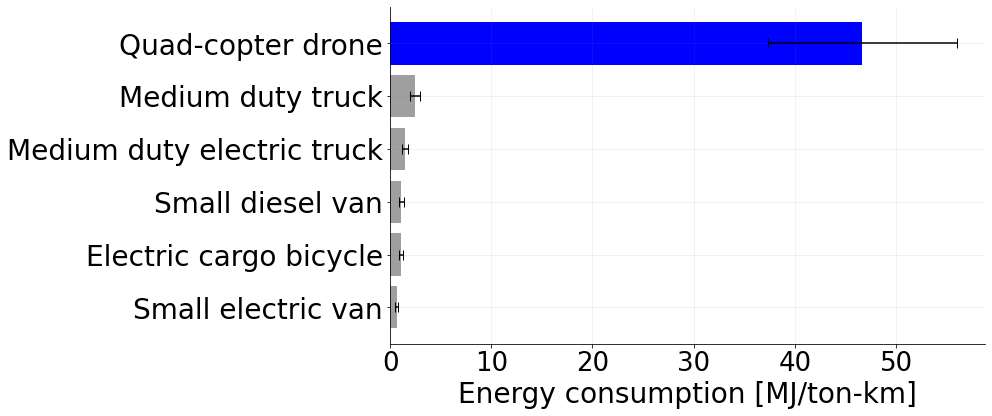

In [48]:
df1 = df.sort_values(by = ['tonkm'], ascending=True).copy()

plt.figure(figsize=(14,8))
color_others = "#9F9F9F"

plt.figure(figsize=(14,6))

plt.barh(df1['Vehicle Class'], df1.tonkm , color = [color_others, color_others, color_others, color_others, color_others, "blue"], 
         xerr= np.array([0.2*df1.tonkm,0.2*df1.tonkm]), capsize =5)

plt.xticks(fontsize=26)
plt.yticks(fontsize=28)
sns.despine(top=True, right=True)
plt.xlabel('Energy consumption [MJ/ton-km]', fontsize=28)
plt.savefig("energy_tonkm.png")
plt.grid(b=True, which='major', axis='both', color='gray', linewidth=1.0, alpha=0.1)
plt.show()

In [49]:
5**8

390625